In [1]:
import re
import string
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
from collections import Counter
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stha_sangam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('Preprocessed Data.csv')

In [3]:
df.shape

(23046, 13)

In [4]:
df.head(10)

,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review
0,AB Aviation,9.0,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...
1,AB Aviation,1.0,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...
2,AB Aviation,1.0,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...
3,Adria Airways,1.0,Please do a favor yourself and do not fly wi...,Economy Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...
4,Adria Airways,1.0,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...
5,Adria Airways,1.0,Had very bad experience with rerouted and ca...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,had very bad experience with rerouted and canc...
6,Adria Airways,1.0,"Ljubljana to Zürich. Firstly, Ljubljana airp...",Economy Class,1.0,1.0,1.0,1.0,NaN,NaN,1.0,no,ljubljana to zrich firstly ljubljana airport i...
7,Adria Airways,1.0,"First of all, I am not complaining about a s...",Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,first of all i am not complaining about a spec...
8,Adria Airways,1.0,Worst Airline ever! They combined two flight...,Economy Class,1.0,2.0,1.0,1.0,1.0,1.0,1.0,no,worst airline ever they combined two flight to...
9,Adria Airways,8.0,Ljubljana to Munich. The homebase airport of ...,Economy Class,4.0,4.0,3.0,5.0,NaN,NaN,5.0,yes,ljubljana to munich the homebase airport of ad...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23046 entries, 0 to 23045
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            23046 non-null  object 
 1   Overall_Rating          22298 non-null  float64
 2   Review                  23046 non-null  object 
 3   Seat Type               22058 non-null  object 
 4   Seat Comfort            19004 non-null  float64
 5   Cabin Staff Service     18899 non-null  float64
 6   Food & Beverages        14493 non-null  float64
 7   Ground Service          18366 non-null  float64
 8   Inflight Entertainment  10824 non-null  float64
 9   Wifi & Connectivity     5917 non-null   float64
 10  Value For Money         22088 non-null  float64
 11  Recommended             23046 non-null  object 
 12  preprocessed_review     23046 non-null  object 
dtypes: float64(8), object(5)
memory usage: 2.3+ MB


**Flair**

In [6]:
from flair.data import Sentence
from flair.nn import Classifier

# Function to predict sentiment
def predict_sentiment_flair(text):
    sentence = Sentence(text)
    # load the NER tagger
    tagger = Classifier.load('sentiment')
    # run NER over sentence
    tagger.predict(sentence)
    # Confidence score (between 0 and 1)
    score = sentence.labels[0].score
    return score

# Apply the function to the dataset
df['sentiment_score'] = df['preprocessed_review'].apply(predict_sentiment_flair)

In [7]:
df.head()

,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review,sentiment_score
0,AB Aviation,9.0,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...,0.974683
1,AB Aviation,1.0,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...,0.999763
2,AB Aviation,1.0,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...,0.982233
3,Adria Airways,1.0,Please do a favor yourself and do not fly wi...,Economy Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...,0.999965
4,Adria Airways,1.0,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...,0.999956


In [8]:
pd.set_option('display.max_colwidth', None)
df[['Review', 'sentiment_score']].head()

,Review,sentiment_score
0,"Moroni to Moheli. Turned out to be a pretty decent airline. Online booking worked well, checkin and boarding was fine and the plane looked well maintained. Its a very short flight - just 20 minutes or so so i didn't expect much but they still managed to hand our a bottle of water and some biscuits which i though was very nice. Both flights on time.",0.974683
1,"Moroni to Anjouan. It is a very small airline. My ticket advised me to turn up at 0800hrs which I did. There was confusion at this small airport. I was then directed to the office of AB Aviation which was still closed. It opened at 0900hrs and I was told that the flight had been put back to 1300hrs and that they had tried to contact me. This could not be true as they did not have my phone number. I was with a local guide and he had not been informed either. I presume that I was bumped off. The later flight did operate but as usual, there was confusion at check-in. The flight was only 30mins and there were no further problems. Not a good airline but it is the only one for Comoros.",0.999763
2,"Anjouan to Dzaoudzi. A very small airline and the only airline based in Comoros. Check-in was disorganised because of locals with big packages and disinterested staff. The flight was fortunately short (30 mins). Took off on time and landed on time. With a short flight like there was of course no in-flight entertainment nor cabin service except for biscuits and a bottle of water, which was quite nice!",0.982233
3,"Please do a favor yourself and do not fly with Adria. On the route from Munich to Pristina in July 2019 they lost my luggage and for 10 days in a row, despite numerous phone calls they were not able to locate it. 11 days later the luggage arrived at the destination completely ruined. Applying for compensation, they ignored my request. Foolishly again, I booked another flight with them (345 euros) Frankfurt - Pristina in September 2019. They cancelled the flight with no reason 24 hours before the departure. Desperate phone calls to customer service to get anything (rerouting, compensation, etc) were not responded. I will never fly again with Adria. What a disgrace! Shame on you Adria for constantly deceiving your customers.",0.999965
4,"Do not book a flight with this airline! My friend and I should have returned from Sofia to Amsterdam on September 22 and 3 days before, they sent us an SMS informing the flight was cancelled. For 3 straight days we tried to reach the airline and the web agent (e-dreams) and we did not get a solution. Finally, 18 hours before our cancelled flight time, and after 35 minutes on a call (waiting), the airline was able to get us on a flight with Lufthansa. Do not book Adria Airways, it is unreliable and in our case, it ruined our last days of holidays since we needed to be on the phones all day.",0.999956


**Data Analysis**

In [10]:
# Count the number of unique values in "Airline Name" column
unique_values_count = df["Airline Name"].nunique()
print(f"Before: Number of unique values in Airline Name: {unique_values_count}")

Before: Number of unique values in Airline Name: 497


In [11]:
# Count the occurrences of each Airline Name
airline_counts = df.groupby("Airline Name")["Airline Name"].transform("count")

# Filter the DataFrame to keep rows where the count is 50 or more
df = df[airline_counts >= 50]

In [12]:
# Count the number of unique values in "Airline Name" column
unique_values_count = df["Airline Name"].nunique()
print(f"After: Number of unique values in Airline Name: {unique_values_count}")

After: Number of unique values in Airline Name: 209


In [13]:
df.shape

(19239, 14)

In [14]:
# Group by "Airline Name" and compute the mean for "sentiment_score"
result = (
    df.groupby("Airline Name")["sentiment_score"]
    .mean()
    .reset_index()
    .sort_values(by="sentiment_score", ascending=False)
)
print(result)

          Airline Name  sentiment_score
44             Avianca         0.999017
6           Aeromexico         0.998265
88   Frontier Airlines         0.998203
97         ITA Airways         0.998076
102           Interjet         0.997755
..                 ...              ...
32             Airlink         0.938804
193   Virgin Australia         0.938518
13        Air Dolomiti         0.933633
18           Air Koryo         0.926075
57       Cathay Dragon         0.918377

[209 rows x 2 columns]


In [15]:
# Extract top 5 airlines with the highest sentiment_score
top_5_airlines = result.nlargest(5, "sentiment_score")
print(top_5_airlines)

          Airline Name  sentiment_score
44             Avianca         0.999017
6           Aeromexico         0.998265
88   Frontier Airlines         0.998203
97         ITA Airways         0.998076
102           Interjet         0.997755


In [16]:
# Extract top 5 airlines with the lowest sentiment_score
last_5_airlines = result.nsmallest(5, "sentiment_score")
print(last_5_airlines)

         Airline Name  sentiment_score
57      Cathay Dragon         0.918377
18          Air Koryo         0.926075
13       Air Dolomiti         0.933633
193  Virgin Australia         0.938518
32            Airlink         0.938804


In [17]:
# Calculate the correlation matrix
columns_of_interest = ["sentiment_score", "Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity", "Value For Money"]
correlation_matrix = df[columns_of_interest].corr()

# Extract the correlation of each column with sentiment_score
correlation_with_sentiment = correlation_matrix["sentiment_score"].sort_values(ascending=False)
print(correlation_with_sentiment)

sentiment_score           1.000000
Inflight Entertainment   -0.170108
Wifi & Connectivity      -0.195767
Food & Beverages         -0.240065
Seat Comfort             -0.243543
Cabin Staff Service      -0.257687
Ground Service           -0.282024
Value For Money          -0.301896
Name: sentiment_score, dtype: float64


**Common Theme**

In [18]:
negative_reviews = df[df["sentiment_score"] < 0.5]["Review"]
positive_reviews = df[df["sentiment_score"] > 0.5]["Review"]

In [27]:
print(negative_reviews)

Series([], Name: Review, dtype: object)


In [28]:
print(positive_reviews)

3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [25]:
df["sentiment_score"].min()

0.5004500150680542

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_words(reviews, num_top_words=500):
    # Initialize CountVectorizer
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words="english", ngram_range=(2, 2))

    # Vectorize the reviews
    dtm = vectorizer.fit_transform(reviews)

    # Get the word frequencies
    word_frequencies = dtm.sum(axis=0).A1  # Sum across all rows (documents)

    # Map words to their frequencies
    words = vectorizer.get_feature_names_out()
    word_freq_dict = dict(zip(words, word_frequencies))

    # Sort the dictionary by frequency in descending order
    top_words = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:num_top_words]

    return top_words

In [29]:
# Get top words for positive and negative reviews
top_positive_words = get_top_words(positive_reviews, num_top_words=500)

# Print top 20 words
print("Top words in positive reviews:")
for word, freq in top_positive_words[:20]:
    print(f"{word}: {freq}")

Top words in positive reviews:
customer service: 3615
cabin crew: 2042
business class: 2037
flight delayed: 1496
return flight: 1157
flight attendants: 1081
connecting flight: 914
flight cancelled: 843
hour flight: 840
ground staff: 805
worst airline: 782
flight time: 749
boarding pass: 715
leg room: 699
delayed hours: 651
flight attendant: 634
hong kong: 631
low cost: 599
booked flight: 582
hours flight: 541


In [31]:
from wordcloud import WordCloud

def generate_wordcloud(reviews, title="Word Cloud", num_top_words=500):
    # Get the top words
    top_words = get_top_words(reviews, num_top_words)

    # Create a dictionary for WordCloud
    word_freq_dict = dict(top_words)

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis('off')
    plt.show()

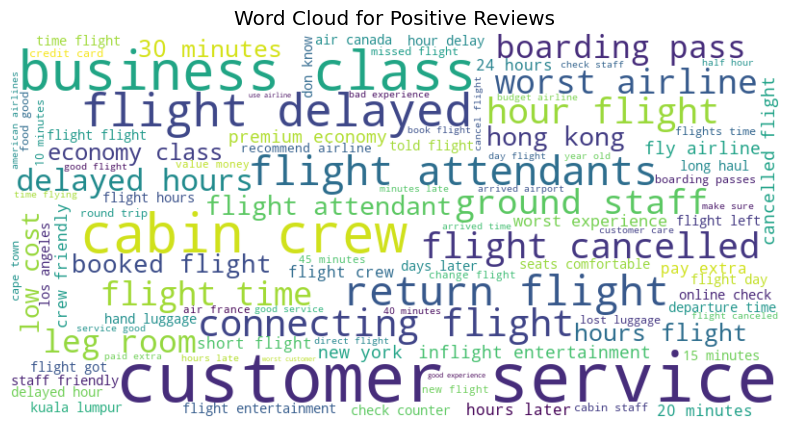

In [32]:
# Generate WordCloud for positive and negative reviews
generate_wordcloud(positive_reviews, title="Word Cloud for Positive Reviews", num_top_words=100)
